In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import datetime
import seaborn as sns
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from wordcloud import WordCloud

def contar(dataFrame, columna):
    llamados = pd.DataFrame(dataFrame[columna].value_counts())
    llamados.columns = ["Cantidad"]
    llamados.index.name = "Fecha"
    llamados.reset_index(inplace = True)
    llamados = llamados.sort_values("Fecha")
    return llamados

def grafico(variable_x, variable_y, color,):
    plot1 = plt.figure(1)
    plt.plot(variable_x, variable_y, color = color, linewidth=2)
    plot1.set_size_inches(12,8)
    plt.grid(color = "white")
    ax = plt.gca()
    ax.set_facecolor("#EBE8EA")
    ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
    ax.spines["right"].set_visible(False) #saca los bordes del gráfico
    ax.spines["left"].set_visible(False) #saca los bordes del gráfico
    ax.spines["top"].set_visible(False) #saca los bordes del gráfico
    plt.show()

def media_movil(base1, columna_datos1, base2, columna_datos2, cantidad_observaciones):
    base1["Media"] = base1[columna_datos1].rolling(cantidad_observaciones).mean()
    base1["Referencia"] = "Media casos confirmados"
    base2["Media"] = base2[columna_datos2].rolling(cantidad_observaciones).mean()
    base2["Referencia"] = "Media llamados"
    medias = pd.merge(base1, base2, on = ["Fecha","Referencia", "Media"], how = "outer", indicator = True)
    medias = medias.sort_values("Fecha")


In [9]:
# Importación de los datos
llamados = pd.read_csv("/home/cecilia/Descargas/llamados_107.csv", sep = ",")
llamados = pd.DataFrame(llamados)
llamados = llamados.drop(llamados[llamados['fecha_llamado']=="01/01/0001"].index) # Se elimina un registro
llamados['fecha_llamado'] = pd.to_datetime(llamados['fecha_llamado'], format = "%d/%m/%Y") # Formato fecha a variable fecha
llamados_cuenta = contar(llamados, "fecha_llamado")
llamados_cuenta = llamados_cuenta[:len(llamados_cuenta)-1] # Se elimina el último registro (llamadas del día que se actualiza el tablero)

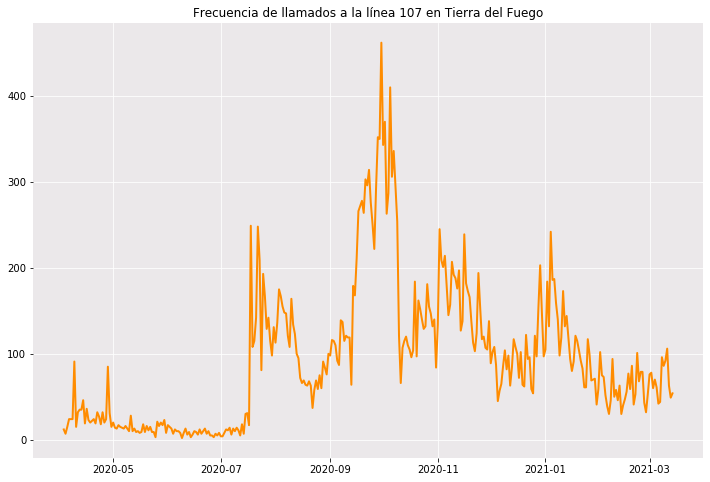

In [14]:
# Gráfico llamadas Tierra del Fuego
plt.title("Frecuencia de llamados a la línea 107 en Tierra del Fuego")
grafico(llamados_cuenta["Fecha"], llamados_cuenta["Cantidad"], color= "darkorange")

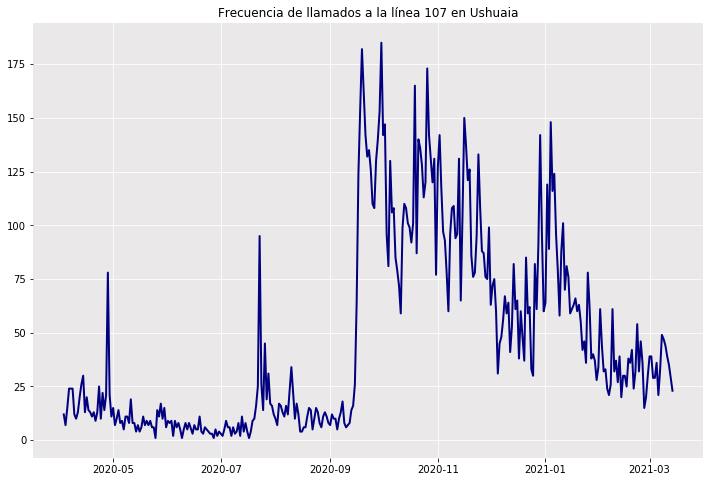

In [27]:
# Gráfico llamadas Ushuaia
llamados_ush = llamados[llamados.locallidad == "Ushuaia"]
llamados_ush = contar(llamados_ush, "fecha_llamado")
llamados_ush = llam_ush[:len(llamados_ush)-1]

plt.title("Frecuencia de llamados a la línea 107 en Ushuaia")
grafico(llamados_ush["Fecha"], llamados_ush["Cantidad"], color = "navy")

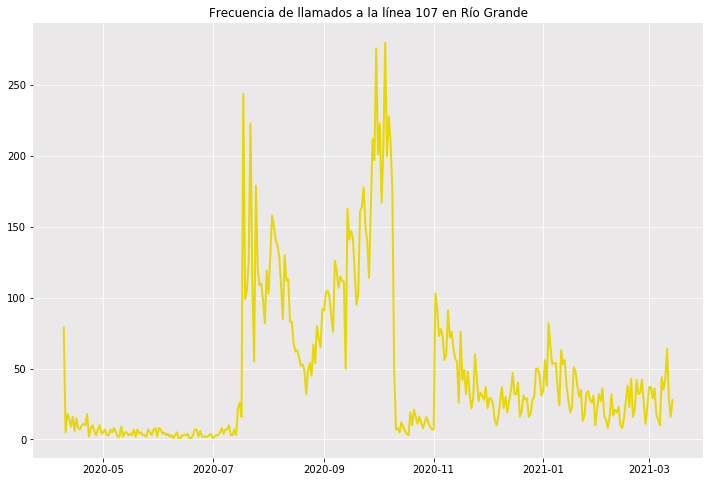

In [28]:
# Gráfico llamadas Río Grande
llamados_rg = llamados[llamados.locallidad == "Río Grande"]
llamados_rg = contar(llamados_rg, "fecha_llamado")
llamados_rg = llamados_rg[:len(llamados_rg)-1]

plt.title("Frecuencia de llamados a la línea 107 en Río Grande")
grafico(llamados_rg["Fecha"], llamados_rg["Cantidad"], color = "#E8D706")

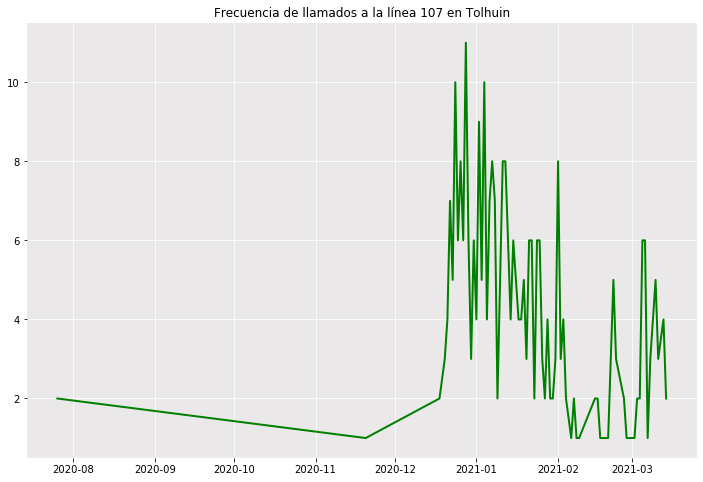

In [29]:
# Gráfico llamadas Tolhuin
llamados_tol = llamados[llamados.locallidad == "Tolhuin"]
llamados_tol = contar(llamados_tol, "fecha_llamado")
llamados_tol = llamados_tol[:len(llamados_tol)-1]

plt.title("Frecuencia de llamados a la línea 107 en Tolhuin")
grafico(llamados_tol["Fecha"], llamados_tol["Cantidad"], color = "green")

In [30]:
# Importación de los casos
casos = pd.read_csv("/home/cecilia/Descargas/sisa/snvsExports/report/TIERRA_DEL_FUEGO-15-03-2021_07-05-22.csv", sep = ",")
casos = pd.DataFrame(casos)

# Selección de los confirmados
casos_confirmados = casos[casos.CLASIF_RESUMEN == "Confirmado"]
casos_confirmados['FECHA_APERTURA'] = pd.to_datetime(casos_confirmados['FECHA_APERTURA'], format = "%d/%m/%Y")

# Recuento de cantidad de confirmados por día
casos_confirmados_cuenta = contar(casos_confirmados, "FECHA_APERTURA")

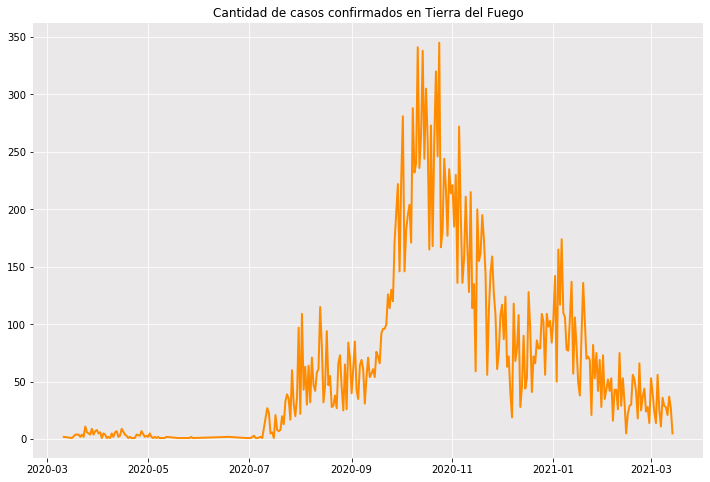

In [32]:
plt.title("Cantidad de casos confirmados en Tierra del Fuego")
grafico(casos_confirmados_cuenta["Fecha"], casos_confirmados_cuenta["Cantidad"], color = "darkorange")

In [42]:
confirmados_cuenta_localidad_fecha = pd.DataFrame(casos_confirmados.groupby(["LOCALIDAD_RESIDENCIA", "FECHA_APERTURA"]).size().reset_index(name = "Cantidad")) # Cuenta cantidad de ocurrencias por localidad y fecha

confirmados_cuenta_localidad_fecha = confirmados_cuenta_localidad_fecha[(confirmados_cuenta_localidad_fecha.LOCALIDAD_RESIDENCIA == "USHUAIA") | (confirmados_cuenta_localidad_fecha.LOCALIDAD_RESIDENCIA == "RIO GRANDE") | (confirmados_cuenta_localidad_fecha.LOCALIDAD_RESIDENCIA == "TOLHUIN")]
confirmados_cuenta_localidad_fecha.columns = ["Localidad", "Fecha", "Cantidad"]


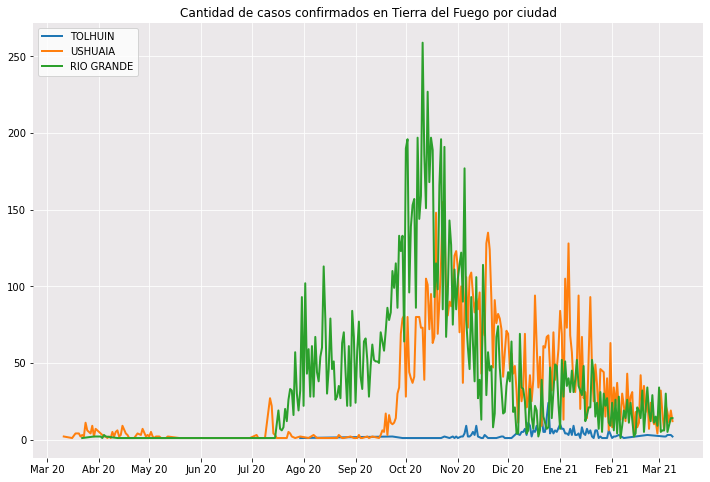

In [35]:
localidad_set = set(confirmados_cuenta_localidad_fecha["Localidad"])
plot6 = plt.figure(6)
for localidad in localidad_set:
    selected_data = confirmados_cuenta_localidad_fecha.loc[confirmados_cuenta_localidad_fecha["Localidad"] == localidad]
    plt.plot(selected_data["Fecha"], selected_data["Cantidad"], label = localidad, linewidth = 2)
plt.legend(loc = "upper left")
plt.grid(color = "white") #grilla de fondo
plt.xticks(["2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],["Mar 20","Abr 20","May 20","Jun 20","Jul 20","Ago 20", "Sep 20", "Oct 20", "Nov 20", "Dic 20", "Ene 21", "Feb 21", "Mar 21"])
plt.title("Cantidad de casos confirmados en Tierra del Fuego por ciudad")
plot6.set_size_inches(12,8)
ax = plt.gca()
ax.set_facecolor("#EBE8EA") #color de fondo
ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
ax.spines["right"].set_visible(False) #saca los bordes del gráfico
ax.spines["left"].set_visible(False) #saca los bordes del gráfico
ax.spines["top"].set_visible(False) #saca los bordes del gráfico
plt.show()

In [33]:
#Cantidad de casos confirmados en Ushuaia
casos_confirmados_ush = casos_confirmados[casos_confirmados.LOCALIDAD_RESIDENCIA == "USHUAIA"]
casos_confirmados_ush = contar(casos_confirmados_ush, "FECHA_APERTURA")

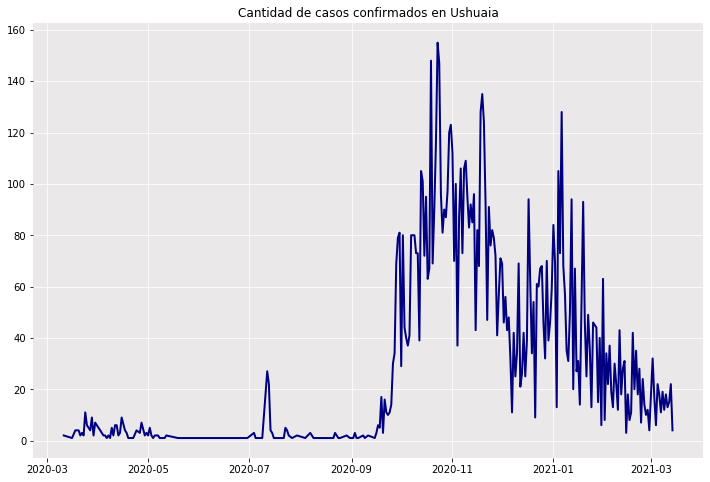

In [35]:
plt.title("Cantidad de casos confirmados en Ushuaia")
grafico(casos_confirmados_ush["Fecha"], casos_confirmados_ush["Cantidad"], color = "navy")

In [36]:
#Cantidad de casos confirmados en Río Grande
casos_confirmados_rg = casos_confirmados[casos_confirmados.LOCALIDAD_RESIDENCIA == "RIO GRANDE"]
casos_confirmados_rg = contar(casos_confirmados_rg, "FECHA_APERTURA")

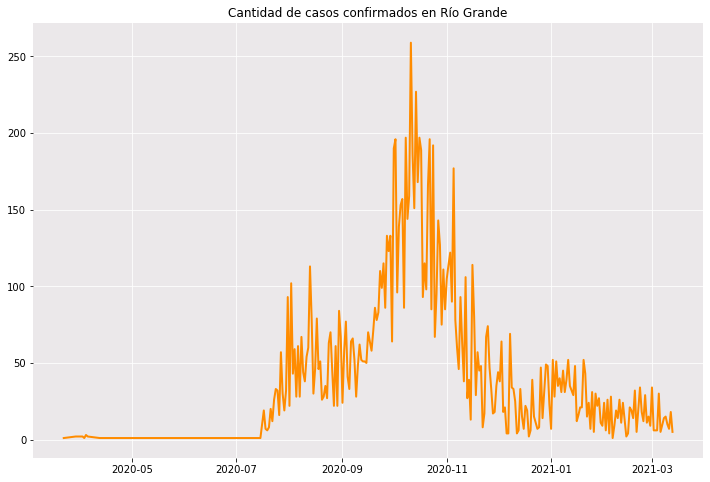

In [38]:
plt.title("Cantidad de casos confirmados en Río Grande")
grafico(casos_confirmados_rg["Fecha"], casos_confirmados_rg["Cantidad"], color = "darkorange")

In [39]:
#Cantidad de casos confirmados en Tolhuin
casos_confirmados_tol = casos_confirmados[casos_confirmados.LOCALIDAD_RESIDENCIA == "TOLHUIN"]
casos_confirmados_tol = contar(casos_confirmados_tol, "FECHA_APERTURA")

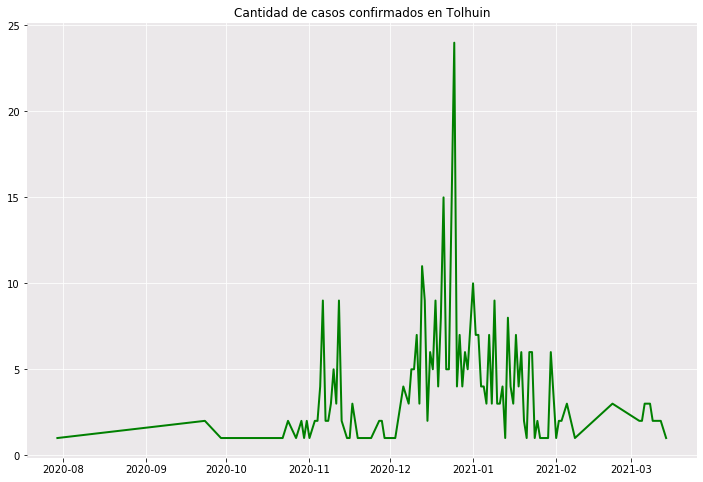

In [41]:
plt.title("Cantidad de casos confirmados en Tolhuin")
grafico(casos_confirmados_tol["Fecha"], casos_confirmados_tol["Cantidad"], color = "green")

In [56]:
media_movil(casos_confirmados_cuenta, "Cantidad", llamados_cuenta, "Cantidad", cantidad_observaciones = 7)


In [52]:
# Medias móviles Tierra del Fuego



medias_set = set(medias["Referencia"])
plot10 = plt.figure(10)
for media in medias_set:
    selected_data = medias.loc[medias["Referencia"] == media]
    plt.plot(selected_data["Fecha"], selected_data["Media"], label = media, linewidth = 2)
plt.legend(loc = "upper left")
plt.grid(color = "white") #grilla de fondo
plt.xticks(["2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],["Mar 20","Abr 20","May 20","Jun 20","Jul 20","Ago 20", "Sep 20", "Oct 20", "Nov 20", "Dic 20", "Ene 21", "Feb 21", "Mar 21"])
plt.title("Media móvil de 7 días para la cantidad de casos y llamados al 107 en Tierra del Fuego")
plot10.set_size_inches(12,8)
ax = plt.gca()
ax.set_facecolor("#EBE8EA") #color de fondo
ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
ax.spines["right"].set_visible(False) #saca los bordes del gráfico
ax.spines["left"].set_visible(False) #saca los bordes del gráfico
ax.spines["top"].set_visible(False) #saca los bordes del gráfico
plt.show()

TypeError: 'NoneType' object is not subscriptable

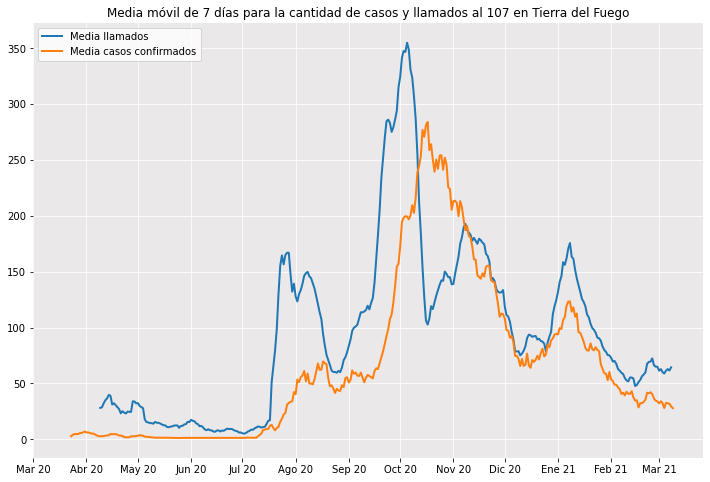

In [98]:
# Medias móviles Tierra del Fuego

confirmados2["Media"] = confirmados2["Cantidad"].rolling(7).mean()
confirmados2["Referencia"] = "Media casos confirmados"
llamados2["Media"] = llamados2["Cantidad"].rolling(7).mean()
llamados2["Referencia"] = "Media llamados"
medias = pd.merge(confirmados2, llamados2, on = ["Fecha","Referencia", "Media"], how = "outer", indicator = True)
medias = medias.sort_values("Fecha")


medias_set = set(medias["Referencia"])
plot10 = plt.figure(10)
for media in medias_set:
    selected_data = medias.loc[medias["Referencia"] == media]
    plt.plot(selected_data["Fecha"], selected_data["Media"], label = media, linewidth = 2)
plt.legend(loc = "upper left")
plt.grid(color = "white") #grilla de fondo
plt.xticks(["2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],["Mar 20","Abr 20","May 20","Jun 20","Jul 20","Ago 20", "Sep 20", "Oct 20", "Nov 20", "Dic 20", "Ene 21", "Feb 21", "Mar 21"])
plt.title("Media móvil de 7 días para la cantidad de casos y llamados al 107 en Tierra del Fuego")
plot10.set_size_inches(12,8)
ax = plt.gca()
ax.set_facecolor("#EBE8EA") #color de fondo
ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
ax.spines["right"].set_visible(False) #saca los bordes del gráfico
ax.spines["left"].set_visible(False) #saca los bordes del gráfico
ax.spines["top"].set_visible(False) #saca los bordes del gráfico
plt.show()

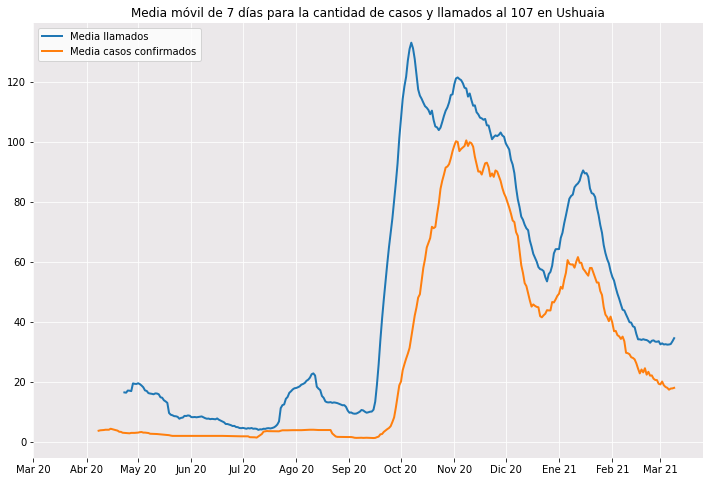

In [103]:
# Medias móviles Ushuaia

conf_ush["Media"] = conf_ush["Cantidad"].rolling(21).mean()
conf_ush["Referencia"] = "Media casos confirmados"
llam_ush2["Media"] = llam_ush2["Cantidad"].rolling(21).mean()
llam_ush2["Referencia"] = "Media llamados"
medias = pd.merge(conf_ush, llam_ush2, on = ["Fecha","Referencia", "Media"], how = "outer", indicator = True)
medias = medias.sort_values("Fecha")


medias_set = set(medias["Referencia"])
plot11 = plt.figure(11)
for media in medias_set:
    selected_data = medias.loc[medias["Referencia"] == media]
    plt.plot(selected_data["Fecha"], selected_data["Media"], label = media, linewidth = 2)
plt.legend(loc = "upper left")
plt.grid(color = "white") #grilla de fondo
plt.xticks(["2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],["Mar 20","Abr 20","May 20","Jun 20","Jul 20","Ago 20", "Sep 20", "Oct 20", "Nov 20", "Dic 20", "Ene 21", "Feb 21", "Mar 21"])
plt.title("Media móvil de 21 días para la cantidad de casos y llamados al 107 en Ushuaia")
plot11.set_size_inches(12,8)
ax = plt.gca()
ax.set_facecolor("#EBE8EA") #color de fondo
ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
ax.spines["right"].set_visible(False) #saca los bordes del gráfico
ax.spines["left"].set_visible(False) #saca los bordes del gráfico
ax.spines["top"].set_visible(False) #saca los bordes del gráfico
plt.show()

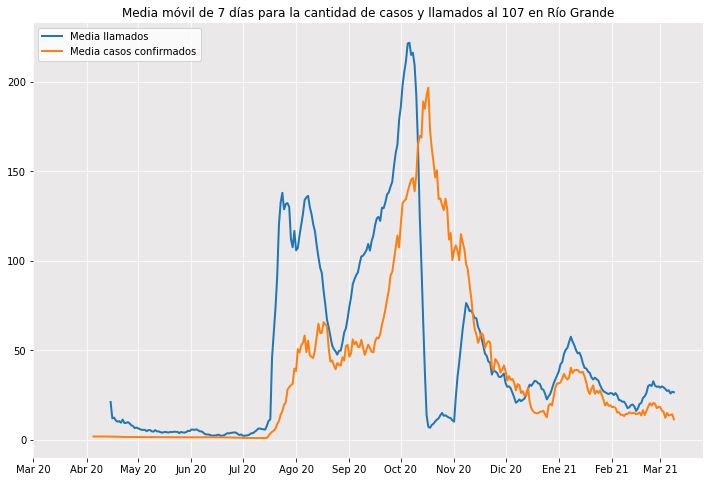

In [44]:
# Medias móviles Río Grande

conf_rg["Media"] = conf_rg["Cantidad"].rolling(7).mean()
conf_rg["Referencia"] = "Media casos confirmados"
llam_rg2["Media"] = llam_rg2["Cantidad"].rolling(7).mean()
llam_rg2["Referencia"] = "Media llamados"
medias = pd.merge(conf_rg, llam_rg2, on = ["Fecha","Referencia", "Media"], how = "outer", indicator = True)
medias = medias.sort_values("Fecha")


medias_set = set(medias["Referencia"])
plot12 = plt.figure(12)
for media in medias_set:
    selected_data = medias.loc[medias["Referencia"] == media]
    plt.plot(selected_data["Fecha"], selected_data["Media"], label = media, linewidth = 2)
plt.legend(loc = "upper left")
plt.grid(color = "white") #grilla de fondo
plt.xticks(["2020-03","2020-04","2020-05","2020-06","2020-07","2020-08","2020-09","2020-10","2020-11","2020-12","2021-01","2021-02","2021-03"],["Mar 20","Abr 20","May 20","Jun 20","Jul 20","Ago 20", "Sep 20", "Oct 20", "Nov 20", "Dic 20", "Ene 21", "Feb 21", "Mar 21"])
plt.title("Media móvil de 7 días para la cantidad de casos y llamados al 107 en Río Grande")
plot12.set_size_inches(12,8)
ax = plt.gca()
ax.set_facecolor("#EBE8EA") #color de fondo
ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
ax.spines["right"].set_visible(False) #saca los bordes del gráfico
ax.spines["left"].set_visible(False) #saca los bordes del gráfico
ax.spines["top"].set_visible(False) #saca los bordes del gráfico
plt.show()

In [45]:
# Cantidad de casos confirmados por ciudad por grupo etareo
conf_ush = confirmados[confirmados.LOCALIDAD_RESIDENCIA == "USHUAIA"]
conf_ge_ush = pd.DataFrame(conf_ush["GRUPO_ETARIO_DECADA"].value_counts())
conf_ge_ush.columns = ["Ushuaia"]
conf_ge_ush.index.name = "Grupo etario"
conf_ge_ush.reset_index(inplace = True)
conf_ge_ush = conf_ge_ush.sort_values("Grupo etario")

conf_rg = confirmados[confirmados.LOCALIDAD_RESIDENCIA == "RIO GRANDE"]
conf_ge_rg = pd.DataFrame(conf_rg["GRUPO_ETARIO_DECADA"].value_counts())
conf_ge_rg.columns = ["Rio Grande"]
conf_ge_rg.index.name = "Grupo etario"
conf_ge_rg.reset_index(inplace = True)
conf_ge_rg = conf_ge_rg.sort_values("Grupo etario")

conf_tol = confirmados[confirmados.LOCALIDAD_RESIDENCIA == "TOLHUIN"]
conf_ge_tol = pd.DataFrame(conf_tol["GRUPO_ETARIO_DECADA"].value_counts())
conf_ge_tol.columns = ["Tolhuin"]
conf_ge_tol.index.name = "Grupo etario"
conf_ge_tol.reset_index(inplace = True)
conf_ge_tol = conf_ge_tol.sort_values("Grupo etario")

In [46]:
# Unión de las tres ciudad
conf_totales = pd.merge(conf_ge_ush, conf_ge_rg, on = ["Grupo etario"], how = "outer")
conf_totales = pd.merge(conf_totales, conf_ge_tol, on = ["Grupo etario"], how = "outer")
conf_totales = conf_totales.fillna(0) #reemplaza el NaN por un 0

In [47]:
# Calculo los totales por columna
total = [conf_totales["Ushuaia"].sum(),conf_totales["Rio Grande"].sum(), conf_totales["Tolhuin"].sum()]
totales = pd.DataFrame({
    "Grupo etario": ["Total"],
    "Ushuaia": [total[0]],
    "Rio Grande": [total[1]],
    "Tolhuin": [total[2]]
})

# Uno el dataframe con sus totales
conf_totales = conf_totales.append(totales)

In [48]:
# Genero una tabla con la información
fig = go.Figure(data=[go.Table(
    header=dict(values=list(conf_totales.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[conf_totales["Grupo etario"], conf_totales["Ushuaia"], conf_totales["Rio Grande"], conf_totales["Tolhuin"]],
               fill_color='lightgrey',
               align='left'))
])

fig.show()

In [49]:
def_ush = confirmados[confirmados.FALLECIDO == "SI"]
def_ush = def_ush[confirmados.LOCALIDAD_RESIDENCIA == "USHUAIA"]
def_ush.head()
def_ush = pd.DataFrame(def_ush["GRUPO_ETARIO_DECADA"].value_counts())
def_ush.columns = ["Ushuaia"]
def_ush.index.name = "Grupo etario"
def_ush.reset_index(inplace = True)
def_ush = def_ush.sort_values("Grupo etario")

def_rg = confirmados[confirmados.FALLECIDO == "SI"]
def_rg = def_rg[confirmados.LOCALIDAD_RESIDENCIA == "RIO GRANDE"]
def_rg.head()
def_rg = pd.DataFrame(def_rg["GRUPO_ETARIO_DECADA"].value_counts())
def_rg.columns = ["Río Grande"]
def_rg.index.name = "Grupo etario"
def_rg.reset_index(inplace = True)
def_rg = def_rg.sort_values("Grupo etario")

def_tol = confirmados[confirmados.FALLECIDO == "SI"]
def_tol = def_tol[confirmados.LOCALIDAD_RESIDENCIA == "TOLHUIN"]
def_tol.head()
def_tol = pd.DataFrame(def_tol["GRUPO_ETARIO_DECADA"].value_counts())
def_tol.columns = ["Tolhuin"]
def_tol.index.name = "Grupo etario"
def_tol.reset_index(inplace = True)
def_tol = def_tol.sort_values("Grupo etario")

In [50]:
defunciones = pd.merge(def_ush, def_rg, on = "Grupo etario", how = "outer")
defunciones = pd.merge(defunciones, def_tol, on = "Grupo etario", how = "outer")
defunciones = defunciones.sort_values("Grupo etario")
defunciones = defunciones.fillna(0)

In [51]:
total = [defunciones["Ushuaia"].sum(), defunciones["Río Grande"].sum(), defunciones["Tolhuin"].sum()]
totales = pd.DataFrame({
    "Grupo etario": ["Total"],
    "Ushuaia": [total[0]],
    "Río Grande": [total[1]],
    "Tolhuin": [total[2]]
})

defunciones = defunciones.append(totales)

In [52]:
# Genero una tabla con la información
fig = go.Figure(data=[go.Table(
    header=dict(values=list(defunciones.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[defunciones["Grupo etario"], defunciones["Ushuaia"], defunciones["Río Grande"], defunciones["Tolhuin"]],
               fill_color='lightgrey',
               align='left'))
])

fig.show()

In [53]:
# Ocupacion de camas en Ushuaia
ocup = pd.DataFrame(conf_ush[["FECHA_APERTURA", "FECHA_INTERNACION", "CURADO", "CUIDADO_INTENSIVO", "FECHA_CUI_INTENSIVOS", "FALLECIDO", "FECHA_ALTA_MEDICA", "FECHA_FALLECIMIENTO"]])
ocup['FECHA_APERTURA'] = pd.to_datetime(ocup['FECHA_APERTURA'], format = "%d/%m/%Y")
ocup['FECHA_INTERNACION'] = pd.to_datetime(ocup['FECHA_INTERNACION'], format = "%d/%m/%Y")
ocup['FECHA_CUI_INTENSIVOS'] = pd.to_datetime(ocup['FECHA_CUI_INTENSIVOS'], format = "%d/%m/%Y")
ocup['FECHA_ALTA_MEDICA'] = pd.to_datetime(ocup['FECHA_ALTA_MEDICA'], format = "%d/%m/%Y")
ocup['FECHA_FALLECIMIENTO'] = pd.to_datetime(ocup['FECHA_FALLECIMIENTO'], format = "%d/%m/%Y")
ocup = ocup.sort_values("FECHA_CUI_INTENSIVOS")

ocup["fecha_alta"] = np.where((ocup["FECHA_CUI_INTENSIVOS"].notnull()) & (ocup["FECHA_ALTA_MEDICA"].notnull()), ocup["FECHA_ALTA_MEDICA"], np.datetime64('NaT'))
ocup["fecha_alta2"] = np.where((ocup["FECHA_CUI_INTENSIVOS"].notnull()) & (ocup["FECHA_FALLECIMIENTO"].notnull()), ocup["FECHA_FALLECIMIENTO"], np.datetime64('NaT'))
ocup["fecha_alta"] = np.where(pd.isnull(ocup["fecha_alta"]), ocup["fecha_alta2"], ocup["fecha_alta"])
ocup["alta_dico"] = np.where(pd.isnull(ocup["fecha_alta"]), 0, 1)


FECHA_INTERNACION = pd.DataFrame(ocup["FECHA_CUI_INTENSIVOS"].value_counts())
FECHA_INTERNACION.columns = ["Internados"]
FECHA_INTERNACION.index.name = "Fecha"
FECHA_INTERNACION.reset_index(inplace= True)
FECHA_INTERNACION = FECHA_INTERNACION.sort_values("Fecha")


FECHA_ALTA = pd.DataFrame(ocup["fecha_alta"].value_counts())
FECHA_ALTA.columns = ["Altas"]
FECHA_ALTA.index.name = "Fecha"
FECHA_ALTA.reset_index(inplace= True)
FECHA_ALTA = FECHA_ALTA.sort_values("Fecha")


fechas_ush = pd.merge(FECHA_INTERNACION, FECHA_ALTA, on = "Fecha", how = "outer")
fechas_ush = fechas_ush.fillna(0)
fechas_ush['Fecha'] = pd.to_datetime(fechas_ush['Fecha'], format = "%d/%m/%Y")
fechas_ush = fechas_ush.sort_values("Fecha")
fechas_ush["Ocup"] = fechas_ush["Internados"] - fechas_ush["Altas"]
fechas_ush["Acumulado"] = np.cumsum(fechas_ush["Ocup"])

Camas_inter_disp_ush = 17

fechas_ush["Porc_ocup"] = round((fechas_ush["Acumulado"]/Camas_inter_disp_ush),2)*100

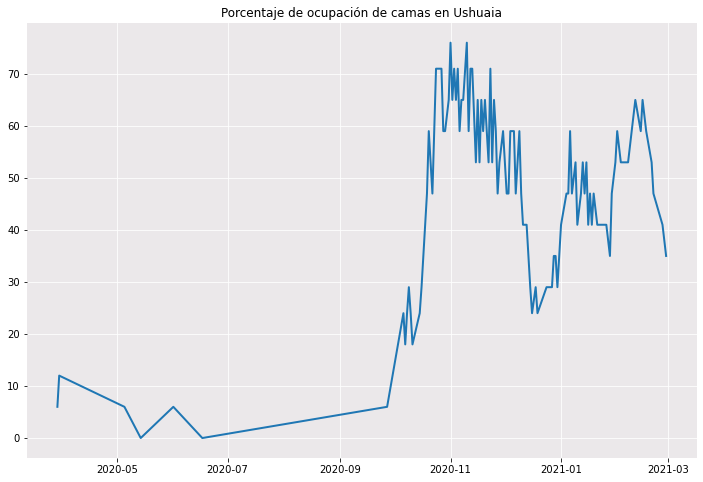

In [54]:
# Gráfico de porcentaje de ocupación de camas en Ushuaia
plot13 = plt.figure(13)
plt.plot(fechas_ush["Fecha"], fechas_ush["Porc_ocup"], linewidth = 2)
plot13.set_size_inches(12,8)

plt.grid(color = "white") #grilla de fondo
plt.title("Porcentaje de ocupación de camas en Ushuaia")
ax = plt.gca()
ax.set_facecolor("#EBE8EA") #color de fondo
ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
ax.spines["right"].set_visible(False) #saca los bordes del gráfico
ax.spines["left"].set_visible(False) #saca los bordes del gráfico
ax.spines["top"].set_visible(False) #saca los bordes del gráfico
plt.show()

In [55]:
# Ocupacion de camas en Rio Grande
ocup_rg = pd.DataFrame(conf_rg[["FECHA_APERTURA", "FECHA_INTERNACION", "CURADO", "CUIDADO_INTENSIVO", "FECHA_CUI_INTENSIVOS", "FALLECIDO", "FECHA_ALTA_MEDICA", "FECHA_FALLECIMIENTO"]])
ocup_rg['FECHA_APERTURA'] = pd.to_datetime(ocup_rg['FECHA_APERTURA'], format = "%d/%m/%Y")
ocup_rg['FECHA_INTERNACION'] = pd.to_datetime(ocup_rg['FECHA_INTERNACION'], format = "%d/%m/%Y")
ocup_rg['FECHA_CUI_INTENSIVOS'] = pd.to_datetime(ocup_rg['FECHA_CUI_INTENSIVOS'], format = "%d/%m/%Y")
ocup_rg['FECHA_ALTA_MEDICA'] = pd.to_datetime(ocup_rg['FECHA_ALTA_MEDICA'], format = "%d/%m/%Y")
ocup_rg['FECHA_FALLECIMIENTO'] = pd.to_datetime(ocup_rg['FECHA_FALLECIMIENTO'], format = "%d/%m/%Y")
ocup_rg = ocup_rg.sort_values("FECHA_CUI_INTENSIVOS")

ocup_rg["fecha_alta"] = np.where((ocup_rg["FECHA_CUI_INTENSIVOS"].notnull()) & (ocup_rg["FECHA_ALTA_MEDICA"].notnull()), ocup_rg["FECHA_ALTA_MEDICA"], np.datetime64('NaT'))
ocup_rg["fecha_alta2"] = np.where((ocup_rg["FECHA_CUI_INTENSIVOS"].notnull()) & (ocup_rg["FECHA_FALLECIMIENTO"].notnull()), ocup_rg["FECHA_FALLECIMIENTO"], np.datetime64('NaT'))
ocup_rg["fecha_alta"] = np.where(pd.isnull(ocup_rg["fecha_alta"]), ocup_rg["fecha_alta2"], ocup_rg["fecha_alta"])
ocup_rg["alta_dico"] = np.where(pd.isnull(ocup_rg["fecha_alta"]), 0, 1)


FECHA_INTERNACION = pd.DataFrame(ocup_rg["FECHA_CUI_INTENSIVOS"].value_counts())
FECHA_INTERNACION.columns = ["Internados"]
FECHA_INTERNACION.index.name = "Fecha"
FECHA_INTERNACION.reset_index(inplace= True)
FECHA_INTERNACION = FECHA_INTERNACION.sort_values("Fecha")


FECHA_ALTA = pd.DataFrame(ocup_rg["fecha_alta"].value_counts())
FECHA_ALTA.columns = ["Altas"]
FECHA_ALTA.index.name = "Fecha"
FECHA_ALTA.reset_index(inplace= True)
FECHA_ALTA = FECHA_ALTA.sort_values("Fecha")


fechas_rg = pd.merge(FECHA_INTERNACION, FECHA_ALTA, on = "Fecha", how = "outer")
fechas_rg = fechas_rg.fillna(0)
fechas_rg['Fecha'] = pd.to_datetime(fechas_rg['Fecha'], format = "%d/%m/%Y")
fechas_rg = fechas_rg.sort_values("Fecha")
fechas_rg["Ocup"] = fechas_rg["Internados"] - fechas_rg["Altas"]
fechas_rg["Acumulado"] = np.cumsum(fechas_rg["Ocup"])

Camas_inter_disp_ush = 21

fechas_rg["Porc_ocup"] = round((fechas_rg["Acumulado"]/Camas_inter_disp_ush),2)*100

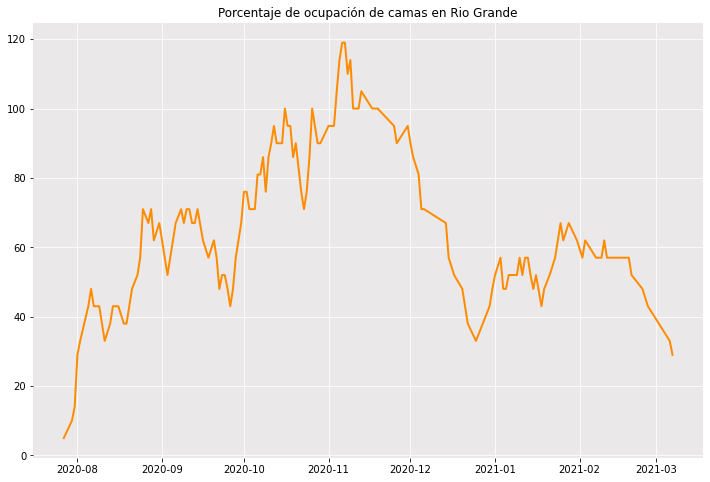

In [104]:
# Gráfico de porcentaje de ocupación de camas en Rio Grande
plot14 = plt.figure(14)
plt.plot(fechas_rg["Fecha"], fechas_rg["Porc_ocup"], color = "darkorange", linewidth = 2)
plot14.set_size_inches(12,8)

plt.grid(color = "white") #grilla de fondo
plt.title("Porcentaje de ocupación de camas en Rio Grande")
ax = plt.gca()
ax.set_facecolor("#EBE8EA") #color de fondo
ax.spines["bottom"].set_visible(False) #saca los bordes del gráfico
ax.spines["right"].set_visible(False) #saca los bordes del gráfico
ax.spines["left"].set_visible(False) #saca los bordes del gráfico
ax.spines["top"].set_visible(False) #saca los bordes del gráfico
plt.show()

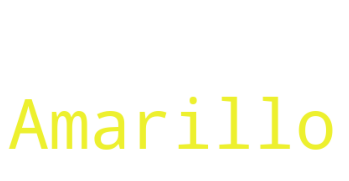

In [105]:
# Semáforo para Ushuaia
llam_ush2 = pd.DataFrame(llam_ush2.iloc[:-7,])
llam_ush2.values.reshape(1,-1)


modelo = LinearRegression().fit(llam_ush2["Cantidad"].values.reshape(-1, 1), llam_ush2["Fecha"])
b = modelo.intercept_
x = fechas_ush["Porc_ocup"][-1:]
piso = 40
medio = 60
alto = 80

condiciones = [
    ((x < 40) & (b < 0)),
    ((x < 40) & (b > 0)),
    ((40 < x) & (x < 60) & (b < 0)),
    ((40 < x) & (x < 60) & (b > 0)),
    ((60 < x) & (x < 80) & (b < 0)),
    ((60 < x) & (x < 80) & (b > 0)),
    ((x > 80) & (b < 0)),
    ((x > 80) & (b > 0))
]

eleccion = ["Verde", "Amarillo", "Verde", "Naranja", "Amarillo", "Rojo", "Naranja", "Rojo"]

semaforo = pd.DataFrame(np.select(condiciones, eleccion))
if semaforo[0][0] == "Green":
    wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (28,166,6)).generate(semaforo[0][0])
elif semaforo[0][0] == "Amarillo":
    wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (237,240,46)).generate(semaforo[0][0])
elif semaforo[0][0] == "Naranja":
    wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (239,147,36)).generate(semaforo[0][0])
else:
    wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (255,0,0)).generate(semaforo[0][0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

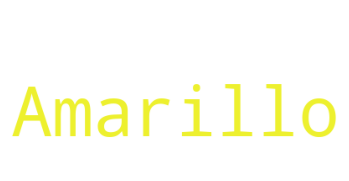

In [145]:
# Semáforo para Rio Grande
llam_rg2 = pd.DataFrame(llam_rg2.iloc[:-7,])
llam_rg2.values.reshape(1,-1)


modelo_rg = LinearRegression().fit(llam_rg2["Cantidad"].values.reshape(-1, 1), llam_rg2["Fecha"])
b_rg = modelo.intercept_
x_rg = fechas_rg["Porc_ocup"][-1:]

condiciones = [
    ((x_rg < 40) & (b_rg < 0)),
    ((x_rg < 40) & (b_rg > 0)),
    ((40 < x_rg) & (x_rg < 60) & (b_rg < 0)),
    ((40 < x_rg) & (x_rg < 60) & (b_rg > 0)),
    ((60 < x_rg) & (x_rg < 80) & (b_rg < 0)),
    ((60 < x_rg) & (x_rg < 80) & (b_rg > 0)),
    ((x_rg > 80) & (b_rg < 0)),
    ((x_rg > 80) & (b_rg > 0))
]

eleccion = ["Verde", "Amarillo", "Verde", "Naranja", "Amarillo", "Rojo", "Naranja", "Rojo"]

semaforo_rg = pd.DataFrame(np.select(condiciones, eleccion))
if semaforo_rg[0][0] == "Green":
    wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (28,166,6)).generate(semaforo_rg[0][0])
elif semaforo_rg[0][0] == "Amarillo":
    wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (237,240,46)).generate(semaforo_rg[0][0])
elif semaforo_rg[0][0] == "Naranja":
    wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (239,147,36)).generate(semaforo_rg[0][0])
else:
    wordcloud = WordCloud(background_color="white", color_func=lambda *args, **kwargs: (255,0,0)).generate(semaforo_rg[0][0])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()